# XGBoost(eXtra Gradient Boost)

In [12]:
import xgboost as xgb
from xgboost import XGBClassifier

## 파라미터

- 주요 일반 파라미터

**booster:**

gbtree, gblinear 선택 디폴트는 gbtree

**slient:**

디폴트는 0이며, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정

**nthread:**

CPU의 실행 스레드 개수를 조정하며, 디폴트는 CPU의 전체 스레드를 다 사용함.

- 주요 부스터 파라미터

**eta[default=0.3,aliasLlearning_rate]:**

GBM의 학습률과 같은 파라미터, 0에서 1사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이터되는 학습률 값.

보통 0.1~0.2사이의 값을 선호

**num_boost_rounds:**

GBM의 n_estimators와 같은 파라미터.

**min_child_weight[default=1]:**

GBM의 min_child_leaf와 유사함. 과적합을 조절하기 위해 사용함.

**gamma[default=0, alias:min_split_loss]:**

트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값. 해당 값보다 큰 손실이 감소된 경우에 리프 노드를 분리함.

값이 클수록 과적합 감소 효과가 있음.

**max_depth[default=6]:**

트리 기반 알고리즘의 max_depth와 같음. 0을 지정하면 깊이에 제한이 없음. max_depth가 높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용함.

**sub_samples[default=1]:**

GBM의 subsample과 동일함. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정함. sub_samples = 0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용함. 0에서 1사이의 값이 가능하나 일반적으로 0.5~1 사이의 값을 사용함.

**colsample_bytree[default=1]:**

GBM의 max_features와 유사함. 트리 생성에 필요한 피처를 임의로 샘플링 하는데 사용함. 매우 많은 피쳐가 있는 경우 과적합을 조정하는데 적용함.

**lambda[default=1, alias:reg_lambda]:**

L2 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.

**alpha[default=0, alias:reg_alpha]:**

L1 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.

**scale_pos_weight[default=1]:**

특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터

- 학습 태스크 파라미터

**objective:**

최솟값을 가져야할 손실 함수를 정의함. XGBoost는 많은 유형의 손실함수를 사용할 수 있음. 주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 달라짐

**binary:logistic:**

이진 분류일 때 적용

**multi:softmax:**

다중 분류일 때 적용. 손실함수가 multi:softmax일 경우에는 레이블 클래스의 개수인 num_class파라미터를 지정해야 함.

**multi:softprob:**

multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환함.

**eval_metric:**

검증에 사용되는 함수를 정의함. 기본값은 회귀인 경우는 rmse, 분류일 경우에는 error.

rmse, mae, logloss, error, merror, mlogloss, auc

과적합 문제가 심각하다면 다음과 같이 적용

- eta값을 낮춤. eta값을 낮출 경우, num_round(또는 n_estimators)는 반대로 눂여줘야함.

- max_depth 값을 낮춤

- min_child_weight 값을 높임.

- gamma 값을 높임.

- 또한 subsample과 colsamples_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있음

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

In [10]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate =0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [15]:
get_clf_eval(y_test,w_preds)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870


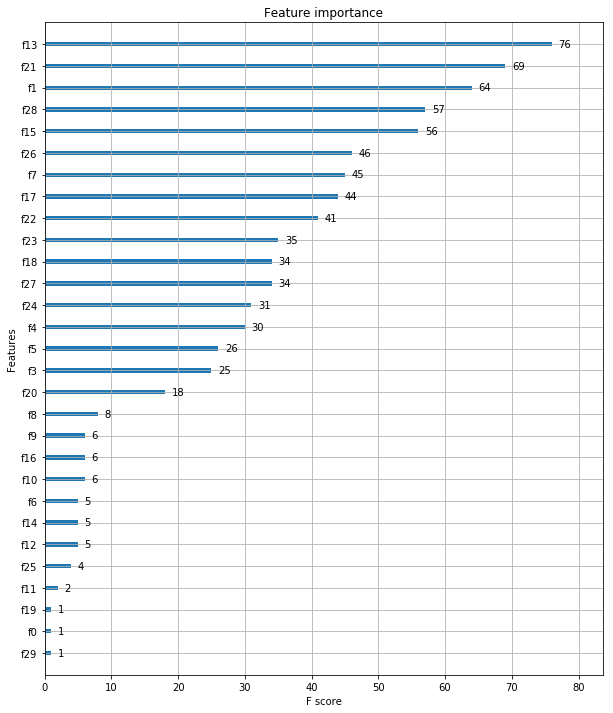

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)